#### GROUP 17: Shuvojyoti Singha, Artjom Smorgulenko, Kaan Özkiliç, Samuel Pasierb

# Stroke Prediction using Support Vector Machine (SVM)

## Background
This notebook uses SVM algorithm to evaluate a dataset where stroke prediction data is recorded. The dataset includes patient information like gender, glucose level and other health related data; and the aim is to predict if patient is likely to have a stroke based on trained data.

This notebook file evaluates how different parameter values and kernels affect the accuracy of SVM.

# Constants
Defined constant variables for readibility and to avoid repetition.

In [1]:
ID = "ID"
GENDER = "Gender"
AGE = "Age"
HYPERTENSION = "Hypertension"
HEART_DISEASE = "Heart Disease"
EVER_MARRIED = "Ever Married"
WORK_TYPE = "Work Type"
RESIDENCE_TYPE = "Residence Type"
AVG_GLUCOSE_LEVEL = "Average Glucose Level"
BMI = "BMI"
SMOKING_STATUS = "Smoking Status"
STROKE = "Stroke"

# Import

In this notebook we've used certain libraries:
- **pandas**: for data handling,
- **numpy**: also for data handling,
- **matplotlib**: for plotting graphs,
- **sklearn**: for implementing SVM algorithm, model evaluation and training-testing split.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold   
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from matplotlib import pyplot as plt

# Loading Dataset

The dataset is downloaded from Kaggle. The dataset includes bunch of columns that are significant to predict stroke prediction.

*Link to the [the dataset from Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).*

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning

The missing data is handled and categorical values are converted to numerical values.

- The missing values are filled with 0.
- ID and work type columns are dropped due to inconvenience.
- Categorical values are replaced with integers.

In [4]:
df.fillna(0, inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
if "id" in df.columns: df = df.drop(["id"], axis=1)
if "work_type" in df.columns: df = df.drop(["work_type"], axis=1)
print(df.columns)
df.columns = [GENDER, AGE, HYPERTENSION, HEART_DISEASE, EVER_MARRIED, RESIDENCE_TYPE, AVG_GLUCOSE_LEVEL, BMI, SMOKING_STATUS, STROKE]
df.head()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')


,Gender,Age,Hypertension,Heart Disease,Ever Married,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Rural,202.21,0.0,never smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1


In [6]:
# gender: male = 0, female = 1, other = 2 ;
# ever married: yes = 1, no = 0 ;
# work type: children = 0, govt job = 1, never worked = 2, private = 3, self-employed = 4 ;
# residence type: rural = 0, urban = 1 ;
# smoking status: formerly smoked = 0, never smoked = 1, smokes = 2, unknown = 3

df[GENDER] = df[GENDER].replace({"Male": 0, "Female": 1, "Other": 2}).astype(int)
df[EVER_MARRIED] = df[EVER_MARRIED].replace({"Yes": 1, "No": 0}).astype(int)
df[RESIDENCE_TYPE] = df[RESIDENCE_TYPE].replace({"Rural": 0, "Urban": 1}).astype(int)
df[SMOKING_STATUS] = df[SMOKING_STATUS].replace({"formerly smoked": 0, "never smoked": 1, "smokes": 2, "Unknown": 3}).astype(int)
df.head()

C:\Users\Kaan\AppData\Local\Temp\ipykernel_27668\4277707953.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[GENDER] = df[GENDER].replace({"Male": 0, "Female": 1, "Other": 2}).astype(int)
C:\Users\Kaan\AppData\Local\Temp\ipykernel_27668\4277707953.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[EVER_MARRIED] = df[EVER_MARRIED].replace({"Yes": 1, "No": 0}).astype(int)
C:\Users\Kaan\AppData\Local\Temp\ipykernel_27668\4277707953.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a

,Gender,Age,Hypertension,Heart Disease,Ever Married,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,0,67.0,0,1,1,1,228.69,36.6,0,1
1,1,61.0,0,0,1,0,202.21,0.0,1,1
2,0,80.0,0,1,1,0,105.92,32.5,1,1
3,1,49.0,0,0,1,1,171.23,34.4,2,1
4,1,79.0,1,0,1,0,174.12,24.0,1,1


# Separating Data and Target

The data is seperated from target values. The `df_data` has input values and `df_target` has the results if stroke occurred.

In [7]:
df_data = df.iloc[:, :-1]
df_target = df.iloc[:, -1]
print(df_data)
print(df_target)

      Gender   Age  Hypertension  Heart Disease  Ever Married  Residence Type  \
0          0  67.0             0              1             1               1   
1          1  61.0             0              0             1               0   
2          0  80.0             0              1             1               0   
3          1  49.0             0              0             1               1   
4          1  79.0             1              0             1               0   
...      ...   ...           ...            ...           ...             ...   
5105       1  80.0             1              0             1               1   
5106       1  81.0             0              0             1               1   
5107       1  35.0             0              0             1               0   
5108       0  51.0             0              0             1               0   
5109       1  44.0             0              0             1               1   

      Average Glucose Level

# Splitting into Training and Testing Sets

The dataset is splitted into training and testing sets. In this cell, 80/20 split is used.

In [8]:
data_train, data_test, target_train, target_test = train_test_split(df_data, df_target, test_size=0.2, shuffle=True, random_state=0)

# Use case identification

SVM’s high-dimensional classification ability is beneficial in face detection and in handwritten text recognition.

<b>Face detection:</b> 
<br>&emsp;SVM can clasifiy wheter an image contains a face or no face which can help in face tracking in videography or security fields and it is used as a basis for face analysis and face recognition<br>
<b>Handwritten text recognition:</b> 
<br>&emsp;SVM can recognize handwritten character and correctly classify them which helps create a digital version of a handwritten text for further processing in post services and signature recognition

# Algorithm Implementation

## 1- Linear

In [9]:
svm_clf = SVC(kernel='linear', C=1, class_weight='balanced')
svm_clf.fit(data_train, target_train)

target_pred = svm_clf.predict(data_test)

print("Accuracy:", accuracy_score(target_test, target_pred))
print("Classification report:\n", classification_report(target_test, target_pred))
print("Confusion matrix:\n", confusion_matrix(target_test, target_pred))

Accuracy: 0.7729941291585127
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       968
           1       0.15      0.72      0.25        54

    accuracy                           0.77      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.94      0.77      0.83      1022

Confusion matrix:
 [[751 217]
 [ 15  39]]


## 2- Polynomial

In [10]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, dual=True, random_state=42)
    )
polynomial_svm_clf.fit(df_data, df_target)

c:\Users\Kaan\.conda\envs\dp_py\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


## 3- Radial Basis Function

In [11]:
svm_rbf = SVC(kernel='rbf', C=1, class_weight='balanced', random_state=42)
svm_rbf.fit(data_train, target_train)
pred_rbf = svm_rbf.predict(data_test)

print("RBF Kernel Accuracy:", accuracy_score(target_test, pred_rbf))
print("Classification report:\n", classification_report(target_test, pred_rbf))
print("Confusion matrix:\n", confusion_matrix(target_test, pred_rbf))

RBF Kernel Accuracy: 0.7416829745596869
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       968
           1       0.14      0.72      0.23        54

    accuracy                           0.74      1022
   macro avg       0.56      0.73      0.54      1022
weighted avg       0.93      0.74      0.81      1022

Confusion matrix:
 [[719 249]
 [ 15  39]]


## Kernal comparison polynomial SVM

In [12]:
poly_pr = polynomial_svm_clf.predict(data_test)

print("Accuracy:", accuracy_score(target_test, poly_pr))
print("Classification report:\n", classification_report(target_test, poly_pr))
print("Confusion matrix:\n", confusion_matrix(target_test, poly_pr))

Accuracy: 0.949119373776908
Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.67      0.07      0.13        54

    accuracy                           0.95      1022
   macro avg       0.81      0.54      0.55      1022
weighted avg       0.94      0.95      0.93      1022

Confusion matrix:
 [[966   2]
 [ 50   4]]


# Parameter Experimentation

In [13]:
c_values = [0.1, 0.5, 1, 2, 5, 10, 20, 50]
results = []

for c_param in c_values:
    svm_test = SVC(kernel='linear', C=c_param, class_weight='balanced', random_state=42)
    svm_test.fit(data_train, target_train)
    pred_test = svm_test.predict(data_test)
    acc = accuracy_score(target_test, pred_test)
    results.append({'C': c_param, 'Accuracy': acc})
    print(f"C={c_param}: Accuracy = {acc:.4f}")

best_result = max(results, key=lambda x: x['Accuracy'])
print(f"\nBest C value: {best_result['C']} with Accuracy: {best_result['Accuracy']:.4f}")

C=0.1: Accuracy = 0.7720
C=0.5: Accuracy = 0.7730
C=1: Accuracy = 0.7730
C=2: Accuracy = 0.7661
C=5: Accuracy = 0.7632
C=10: Accuracy = 0.7515
C=20: Accuracy = 0.7427
C=50: Accuracy = 0.7025

Best C value: 0.5 with Accuracy: 0.7730


## Kernel Comparison

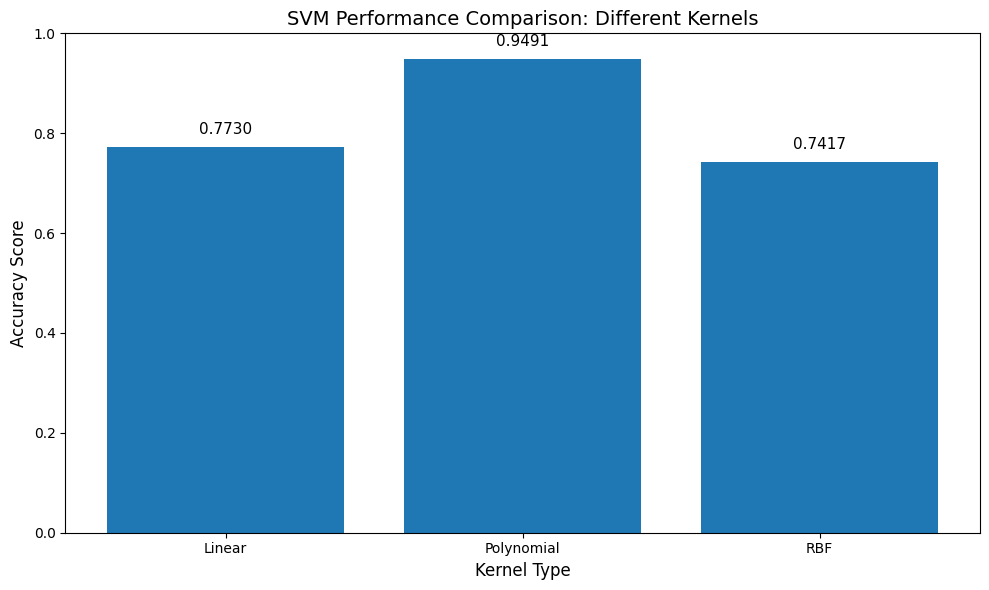

In [14]:
kernels = ['Linear', 'Polynomial', 'RBF']
accuracies = [
    accuracy_score(target_test, target_pred),
    accuracy_score(target_test, poly_pr),
    accuracy_score(target_test, pred_rbf)
]

plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracies)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Kernel Type', fontsize=12)
plt.title('SVM Performance Comparison: Different Kernels', fontsize=14)
plt.ylim([0, 1])
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.show()